In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from astropy import units as u
from scipy.stats import norm
from specutils.spectra import Spectrum1D
from pytodcor.xcor.todcor import todcor
from pytodcor.lib.spectrum import Spectrum

This notebook captures unit tests for the `todcor` function. The same tests are defined in a unittest .py file, but the notebook allows for further interactivity and visualization for debugging purposes when needed.

Case Parameters:

  - Is Observed X-Axis Identical To Templates' X-Axis? FALSE

  - Is There No Shift Between Observed Feature and Template Feature? TRUE

  - Is There No Difference In Shape Of Observed Feature Height Compared To Template? TRUE

  - Is There No Difference in Shape Of Observed Feature Width Compared To Template? TRUE

  - Is The Scaling Ratio Between Model Templates Fixed? TRUE

# Case #2:

Observed and Template X-Axes differ, so this tests for overlap gaps between template and observed wavelength coverage as the shifts are applied. Two sets are run: one where the observed spectrum is a superset of the template x-axes, and one where the observed spectrum is a subset of the template x-axes. The features in the observed spectrum and templates are at the same x-axis location, so the algorithm should find no need to apply a shift to match. The height and width of the observed spectral features are identical to the templates, so the algorithm should find exactly two peaks when shifting both models (4 total peaks.) The scaling ratio between the two models is fixed to 1.0.

In [2]:
# Generate the Gaussians to use.
gauss_1_peak = 5380.
gauss_2_peak = 5420.
xvals = np.linspace(5300., 5500., 1000)
xvals_subset = xvals[199:-201]
g1_y = norm.pdf(xvals, gauss_1_peak, 4.)
g2_y = norm.pdf(xvals, gauss_2_peak, 4.)
g1_y_subset = norm.pdf(xvals_subset, gauss_1_peak, 4.)
g2_y_subset = norm.pdf(xvals_subset, gauss_2_peak, 4.)

# Set 1 where obs is a superset of the template wavelength range.
set1 = {'obs_x':xvals, 'obs_y':g1_y + g2_y, 'mod1_x': xvals_subset,
        'mod2_x':xvals_subset, 'mod1_y':g1_y_subset, 'mod2_y':g2_y_subset}
# Set 2 where obs is a subset of the template wavelength range.
set2 = {'obs_x':xvals_subset, 'obs_y':g1_y_subset + g2_y_subset,
        'mod1_x': xvals, 'mod2_x':xvals, 'mod1_y':g1_y, 'mod2_y':g2_y}
# Identify how many data points separate the two peaks. This is used later when checking results.
n_pix_apart_set1 = len(np.where((set1['obs_x'] >= gauss_1_peak) &
                                (set1['obs_x'] <= gauss_2_peak))[0])
n_pix_apart_set2 = len(np.where((set2['obs_x'] >= gauss_1_peak) &
                                (set2['obs_x'] <= gauss_2_peak))[0])
set1['n_pix_apart'] = n_pix_apart_set1
set2['n_pix_apart'] = n_pix_apart_set2

all_sets = [set1, set2]

In [3]:
# Create Spectrum objects out of the simulated datasets.
all_spec = []
for ii, this_set in enumerate(all_sets):
    obs_spec1d = Spectrum1D(flux=this_set['obs_y']*u.dimensionless_unscaled,
                               spectral_axis=this_set['obs_x']*u.angstrom)
    obs_spec = Spectrum(name="Case_02_Obs_Set"+str(ii+1), air_or_vac="vacuum")
    obs_spec.add_spec_part(obs_spec1d)

    mod1_spec1d = Spectrum1D(flux=this_set['mod1_y']*u.dimensionless_unscaled,
                               spectral_axis=this_set['mod1_x']*u.angstrom)
    mod1_spec = Spectrum(name="Case_02_Mod1_Set"+str(ii+1), air_or_vac="vacuum")
    mod1_spec.add_spec_part(mod1_spec1d)

    mod2_spec1d = Spectrum1D(flux=this_set['mod2_y']*u.dimensionless_unscaled,
                               spectral_axis=this_set['mod2_x']*u.angstrom)
    mod2_spec = Spectrum(name="Case_02_Mod2_Set"+str(ii+1), air_or_vac="vacuum")
    mod2_spec.add_spec_part(mod2_spec1d)

    all_spec.append({'obs_spec':obs_spec, 'mod1_spec':mod1_spec, 'mod2_spec':mod2_spec,
                    'n_pix_apart':this_set['n_pix_apart']})

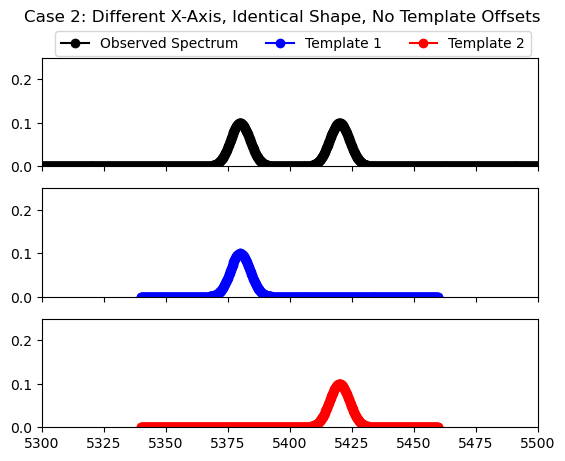

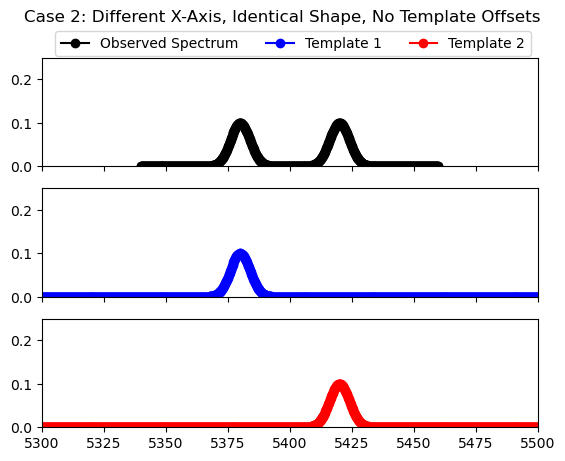

In [4]:
# Visualize the spectrum and templates.
for aspec in all_spec:
    fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True)
    minx = min(min(aspec['obs_spec'].parts[0].spectral_axis).value,
               min(aspec['mod1_spec'].parts[0].spectral_axis).value)
    maxx = max(max(aspec['obs_spec'].parts[0].spectral_axis).value,
               max(aspec['mod1_spec'].parts[0].spectral_axis).value)
    ax1.set_xlim([minx, maxx])
    ax1.set_ylim([0., 0.25])
    ax2.set_ylim([0., 0.25])
    ax3.set_ylim([0., 0.25])
    ax1.plot(aspec['obs_spec'].parts[0].spectral_axis,
             aspec['obs_spec'].parts[0].flux, '-ko', label="Observed Spectrum")
    ax2.plot(aspec['mod1_spec'].parts[0].spectral_axis,
             aspec['mod1_spec'].parts[0].flux, '-bo', label="Template 1")
    ax3.plot(aspec['mod2_spec'].parts[0].spectral_axis,
             aspec['mod2_spec'].parts[0].flux, '-ro', label="Template 2")
    fig.suptitle("Case 2: Different X-Axis, Identical Shape, No Template Offsets")
    fig.legend(ncols=3, bbox_to_anchor=[0.9, 0.95])
    plt.show()

Resampling observed spectrum and first template to a common log-lambda wavelength scale...
...total time taken = 0.04471199999999986 seconds.
Resampling observed spectrum and second template to a common log-lambda wavelength scale...
...total time taken = 0.0417599999999998 seconds.
Calculating cross-correlations...
199


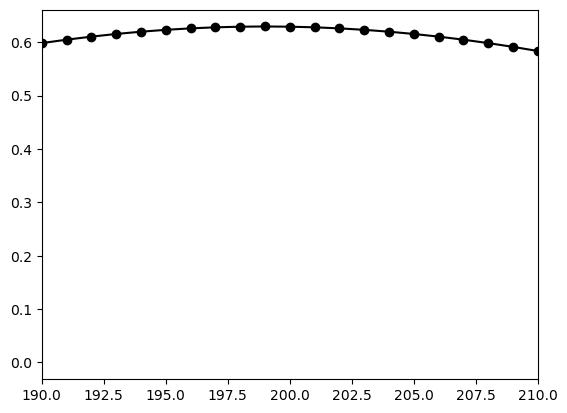

> /Users/fleming/Work/SDSS/pytodcor/pytodcor/xcor/todcor.py(133)todcor()
    131 
    132     # Calculate cross-correlation function of observed spectrum versus model_2.
--> 133     corr2, lag2 = xcor1d(obs_spec_loglin.flux, model_2_loglin.flux)
    134 
    135     # Calculate cross-correlation function of model_1 versus model_2.



ipdb>  plt.xlim()


(0.0, 1.0)


ipdb>  plt.show()


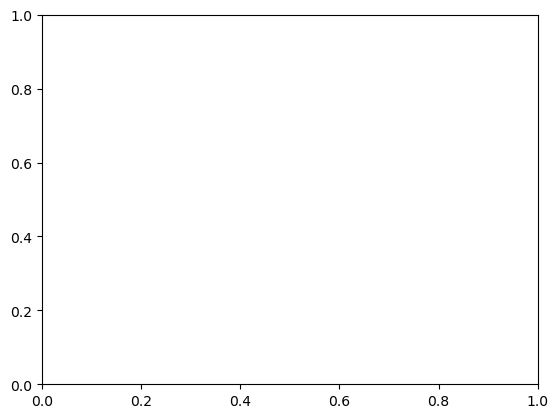

ipdb>  lag1[ind]


array([ 199,  399,  398, ...,  -96, -137,  704])


ipdb>  lag1[ind[0:10]]


array([199, 399, 398, 200, 198, 400, 397, 201, 197, 401])


In [ ]:
# Compute the TODCOR result.
all_results = []
for aspec in all_spec:
    todcor_pixshifts, vel_per_pix, todcor_vals, todcor_alphas = todcor(aspec['obs_spec'].parts[0],
                                                                       aspec['mod1_spec'].parts[0],
                                                                       aspec['mod2_spec'].parts[0],
                                                                       400, fixed_alpha=1.,
                                                                       vel_range=[-500., 500.])
    all_results.append({'todcor_pixshifts':todcor_pixshifts, 'vel_per_pix':vel_per_pix,
                        'todcor_vals':todcor_vals, 'todcor_alphas':todcor_alphas,
                       'n_pix_apart':aspec['n_pix_apart']})

In [ ]:
%matplotlib widget
for result in all_results:
    todcor_pixshifts = result['todcor_pixshifts']
    todcor_vals = result['todcor_vals']
    n_pix_apart = result['n_pix_apart']
    # Plot the TODCOR values as a projection across the two template shifts.
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    X, Y = np.meshgrid(todcor_pixshifts, todcor_pixshifts, indexing='ij')
    Z = todcor_vals
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    ax.set_xlabel("Primary Template Shift")
    ax.set_ylabel("Secondary Template Shift")
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

    # Plot slices along a specified shift of one of the templates.
    x_fix_shift_1 = 0
    x_fix_shift_2 = n_pix_apart
    y_fix_shift_1 = 0
    y_fix_shift_2 = -1*n_pix_apart

    where_x1 = np.where(todcor_pixshifts == x_fix_shift_1)[0][0]
    where_x2 = np.where(todcor_pixshifts == x_fix_shift_2)[0][0]

    where_y1 = np.where(todcor_pixshifts == y_fix_shift_1)[0][0]
    where_y2 = np.where(todcor_pixshifts == y_fix_shift_2)[0][0]

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(6, 12))
    ax1.plot(todcor_pixshifts, todcor_vals[where_x1, :], '-ko')
    ax1.set_title("Pri. Shift = 0")
    ax2.plot(todcor_pixshifts, todcor_vals[where_x2, :], '-ko')
    ax2.set_title("Pri. Shift = 200")
    ax3.plot(todcor_pixshifts, todcor_vals[:, where_y1], '-ko')
    ax3.set_title("Sec. Shift = 0")
    ax4.plot(todcor_pixshifts, todcor_vals[:, where_y2], '-ko')
    ax4.set_title("Sec. Shift = -200")
    fig.tight_layout()
    plt.show()

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(all_results[0]['todcor_pixshifts'], all_results[0]['todcor_vals'][400, :], '-k')
ax.plot(all_results[1]['todcor_pixshifts'], all_results[1]['todcor_vals'][400, :], '-b')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(1,1)
ax.plot(all_results[0]['todcor_pixshifts'], all_results[0]['todcor_vals'][:, 400], '-k')
ax.plot(all_results[1]['todcor_pixshifts'], all_results[1]['todcor_vals'][:, 400], '-b')
fig.tight_layout()
plt.show()